In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/ZafarAqil/Solar-Radiation-Prediction/Major/SolarDelhi.csv',parse_dates = ['Date'], index_col = ['Date'])

In [3]:
data.head()

,Precipitation,Specific_Humidity,Surface Pressure,Surface_Temperature,Clearness_Index,Radiative_Flux,Radiation
Date,,,,,,,
1986-01-01,0.0,0.003804,99.05,11.48,0.68,6.50,3.97
1986-02-01,0.0,0.003457,99.06,12.04,0.76,6.36,4.42
1986-03-01,0.0,0.002902,99.23,9.92,0.73,6.50,4.29
1986-04-01,0.0,0.002433,99.17,9.33,0.72,6.18,4.19
1986-05-01,0.0,0.002600,99.00,9.36,0.75,6.57,4.39


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


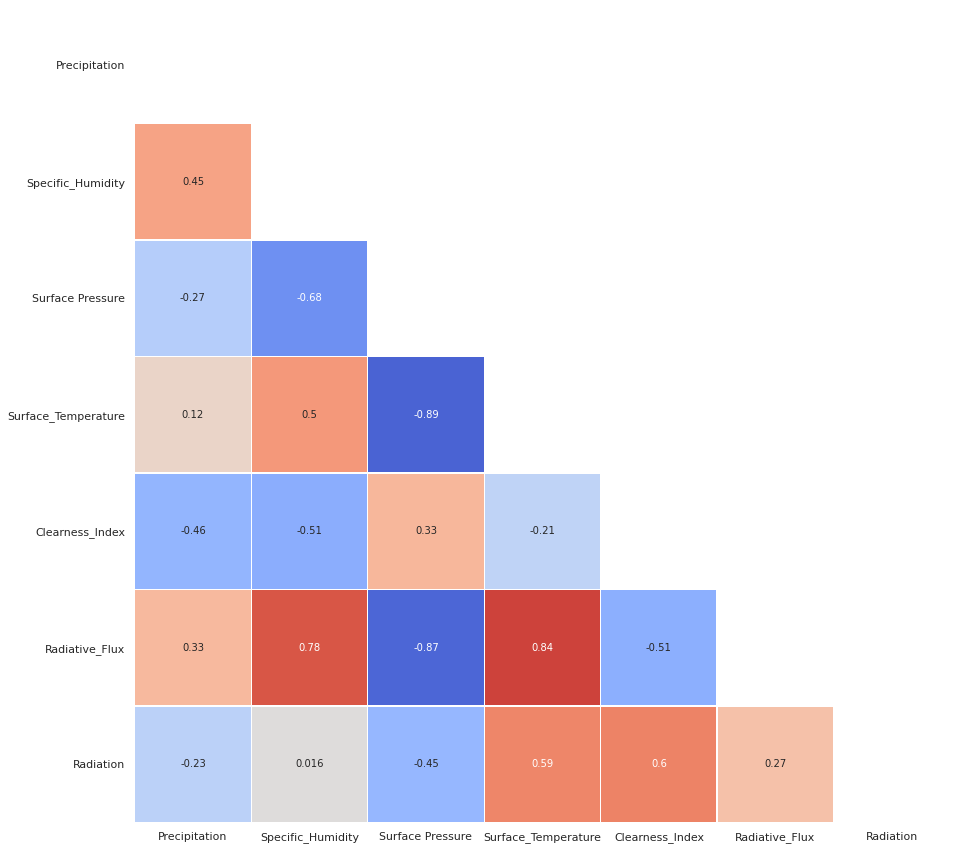

In [4]:
import numpy as np # linear algebra
from scipy import stats # statistics
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting tools
import seaborn as sns # advanced plotting tools
sns.set(style="white")
%matplotlib inline
def corrPairs(df):
    #Pairwise correlation matrix
    corr = df.corr() # Compute the correlation matrix
    mask = np.zeros_like(corr, dtype=np.bool) # make mask
    mask[np.triu_indices_from(mask)] = True # mask upper triangle
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.3, annot=True, cbar=False)

#data['WeekOfYear'] = data.index.Date # add week to view correlation

plt.figure(figsize=(15,15))
corrPairs(data)

In [5]:
data.corr()

,Precipitation,Specific_Humidity,Surface Pressure,Surface_Temperature,Clearness_Index,Radiative_Flux,Radiation
Precipitation,1.000000,0.452469,-0.265497,0.115499,-0.458199,0.325617,-0.231088
Specific_Humidity,0.452469,1.000000,-0.676242,0.501783,-0.514246,0.784656,0.015835
Surface Pressure,-0.265497,-0.676242,1.000000,-0.891904,0.334998,-0.872245,-0.446472
Surface_Temperature,0.115499,0.501783,-0.891904,1.000000,-0.208347,0.844994,0.589007
Clearness_Index,-0.458199,-0.514246,0.334998,-0.208347,1.000000,-0.505756,0.603927
Radiative_Flux,0.325617,0.784656,-0.872245,0.844994,-0.505756,1.000000,0.272500
Radiation,-0.231088,0.015835,-0.446472,0.589007,0.603927,0.272500,1.000000


In [0]:
input_feature= data.iloc[:, :].values
input_data = input_feature

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,:] = sc.fit_transform(input_feature[:,:])

In [9]:
input_data[0]

array([0.        , 0.1348561 , 0.76595745, 0.13535197, 0.84615385,
       0.12868217, 0.46593674])

In [0]:
lookback= 50

test_size=int(.3 * len(data))
X=[]
y=[]
for i in range(len(data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,6])

In [11]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 7)
X_test = X_test.reshape(X_test.shape[0],lookback, 7)
print(X.shape)
print(X_test.shape)

(12235, 50, 7)
(3735, 50, 7)


In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense, LSTM
model = tf.keras.Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],7)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

RuntimeError: ignored

In [0]:
def r2_score(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mape', r2_score])

In [0]:
history = model.fit(X, y, epochs=50, batch_size=200)

Epoch 1/50
12235/12235 [==============================] - 8s 645us/step - loss: 0.0349 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 44588.1877 - r2_score: -0.1520
Epoch 2/50
12235/12235 [==============================] - 6s 522us/step - loss: 0.0172 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 35830.3313 - r2_score: 0.4294
Epoch 3/50
12235/12235 [==============================] - 6s 519us/step - loss: 0.0164 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 36720.1344 - r2_score: 0.4583
Epoch 4/50
12235/12235 [==============================] - 7s 550us/step - loss: 0.0157 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 34804.1890 - r2_score: 0.4772
Epoch 5/50
12235/12235 [==============================] - 7s 533us/step - loss: 0.0152 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 37203.0757 - r2_score: 0.4949
Epoch 6/50
12235/12235 [==============================] - 7s 541us/step - loss: 0.0153 - mean_

12235/12235 [==============================] - 7s 611us/step - loss: 0.0121 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 30584.9698 - r2_score: 0.5989
Epoch 47/50
12235/12235 [==============================] - 7s 563us/step - loss: 0.0120 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 29051.1978 - r2_score: 0.6030
Epoch 48/50
12235/12235 [==============================] - 7s 536us/step - loss: 0.0121 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 27802.1176 - r2_score: 0.6002
Epoch 49/50
12235/12235 [==============================] - 7s 539us/step - loss: 0.0121 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 28720.2465 - r2_score: 0.6004
Epoch 50/50
12235/12235 [==============================] - 7s 544us/step - loss: 0.0120 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 27720.8078 - r2_score: 0.5998


In [0]:
predicted_value= model.predict(X_test)

dict_keys(['loss', 'mean_absolute_error', 'mean_absolute_percentage_error', 'r2_score'])


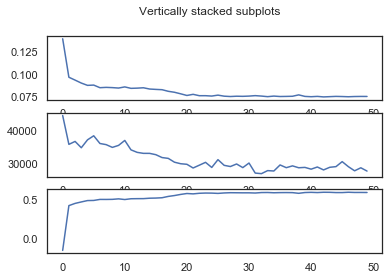

In [0]:
history_dict = history.history
print(history_dict.keys())
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(history.history['loss'])
axs[1].plot(history.history['mae'])
axs[2].plot(history.history['mape'])
axs[3].plot(history.history['r2_score'])
# plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['mean_absolute_percentage_error'])
# plt.plot(history.history['r2_score'])

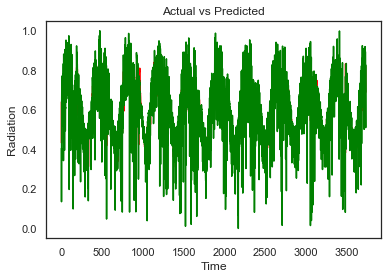

In [0]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),6], color='green')
plt.title("Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Radiation")
plt.show()